# Problem１

In [319]:
# requirements
import numpy as np
import matplotlib.pyplot as plt
import cvxpy as cv

In [320]:
# dataset 4
np.random.seed(1234)
n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

In [321]:
# Prepare
X = np.column_stack([np.ones(n), x_d4])
y = y_d4

In [322]:
# Logistic regression functions
def sigmoid(z):
    return np.where(z >= 0, 1 / (1 + np.exp(-z)), np.exp(z) / (1 + np.exp(z)))

def logistic_loss(w, X, y):
    z = y * (X @ w)
    return np.sum(np.log(1 + np.exp(-z)))

def logistic_gradient(w, X, y):
    z = y * (X @ w)
    sigmoid_z = sigmoid(-z)
    return -X.T @ (y * sigmoid_z)

def logistic_hessian(w, X, y):
    z = y * (X @ w)
    sigmoid_z = sigmoid(-z)
    weights = sigmoid_z * (1 - sigmoid_z)
    return X.T @ (weights[:, np.newaxis] * X)

In [323]:
# Lipschitz constant calculation
def compute_lipschitz_constant(X):
    XTX = X.T @ X
    eigenvalues = np.linalg.eigvals(XTX)
    L = 0.25 * np.max(eigenvalues)
    return L

L = compute_lipschitz_constant(X)
optimal_lr = 1.0 / L  # Optimal learning rate

In [324]:
loss_hist_batch = [] # to store the history of loss J(w_t)

# implement batch steepest gradient method here
def batch_gradient_descent(X, y, max_iter=100, lr=0.1, tol=1e-8):
    w = np.zeros(X.shape[1])  # Initialize weights
    loss_history = []

    for t in range(max_iter):
        # Compute loss
        loss = logistic_loss(w, X, y)
        loss_history.append(loss)

        # Compute gradient
        grad = logistic_gradient(w, X, y)

        # Check convergence
        if np.linalg.norm(grad) < tol:
            print(f"Batch GD converged at iteration {t}")
            break

        # Update weights
        w -= lr * grad

    return w, loss_history

w_batch, loss_hist_batch = batch_gradient_descent(X, y, max_iter=100, lr=optimal_lr)

In [325]:
loss_hist_newton = [] # to store the history of loss J(w_t)

# implement Newton based method here
def newton_method(X, y, max_iter=100, tol=1e-8):
    w = np.zeros(X.shape[1])  # Initialize weights
    loss_history = []
    converged_iter = None

    for t in range(max_iter):
        # Compute loss
        loss = logistic_loss(w, X, y)
        loss_history.append(loss)

        # Compute gradient
        grad = logistic_gradient(w, X, y)

        # Check convergence
        if np.linalg.norm(grad) < tol and converged_iter is None:
            print(f"Newton method converged at iteration {t}")
            converged_iter = t
            final_loss = loss
            break

        # Compute Hessian
        hess = logistic_hessian(w, X, y)

        delta_w = np.linalg.solve(hess, grad)
        w -= delta_w

    # Fill remaining iterations with final loss value if converged early
    if converged_iter is not None:
        while len(loss_history) < max_iter:
            loss_history.append(final_loss)

    return w, loss_history

w_newton, loss_hist_newton = newton_method(X, y, max_iter=100)

Newton method converged at iteration 8


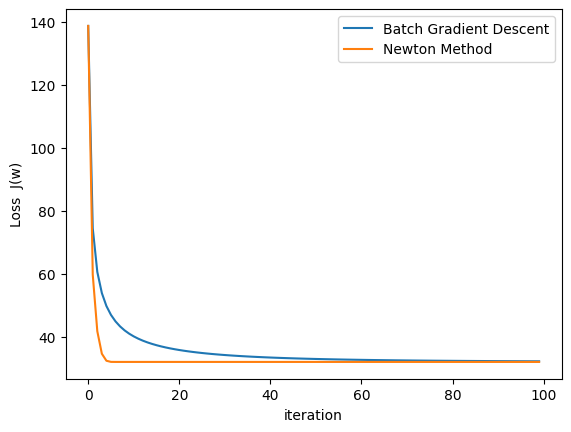

In [326]:
plt.plot(loss_hist_batch, label='Batch Gradient Descent')
plt.plot(loss_hist_newton, label='Newton Method')
plt.xlabel('iteration')
plt.ylabel('Loss  J(w)')
plt.legend()

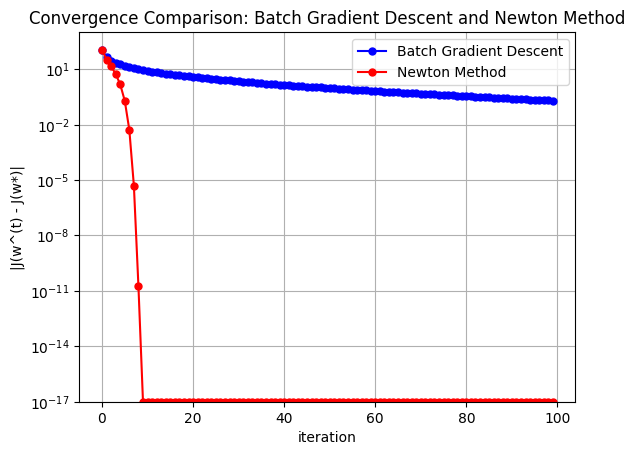

In [327]:
J_opt = min(loss_hist_newton[-1], loss_hist_batch[-1])
diff_batch = np.abs(np.array(loss_hist_batch) - J_opt)
diff_newton = np.abs(np.array(loss_hist_newton) - J_opt)

plt.semilogy(range(len(diff_batch)), diff_batch, 'b-', label='Batch Gradient Descent', marker='o', markersize=5, markerfacecolor='blue')
plt.semilogy(range(len(diff_newton_plot)), diff_newton_plot, 'r-', label='Newton Method', marker='o', markersize=5, markerfacecolor='red')
plt.xlabel('iteration')
plt.ylabel('|J(w^(t) - J(w*)|')
plt.title('Convergence Comparison: Batch Gradient Descent and Newton Method')
plt.legend()
plt.grid(True)
plt.ylim(1e-17, None)

plt.show()